In [22]:
import requests
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps

In [29]:
img = Image.open("/content/t2.jpg").convert("L")
img = ImageOps.invert(img)
img = img.resize((28, 28))
img_arr = np.array(img)
img_arr = img_arr / 255.0
img_arr = img_arr.reshape(28, 28, 1)
img

In [30]:
API_KEY = "ZcbwcMahQ_rkhcVB9ruUffQ-NZ-897oTRQTlHjO45fHy"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

payload_scoring = {"input_data": [{"fields": [], "values": [img_arr.tolist()]}]}

response_scoring = requests.post('https://eu-gb.ml.cloud.ibm.com/ml/v4/deployments/a58d5ede-1352-45ae-b567-579b1e429ee1/predictions?version=2022-11-19', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})

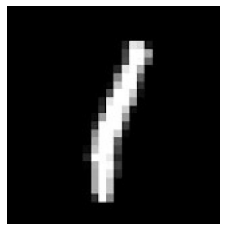

Result:  1


In [31]:
plt.imshow(plt.imread("/content/t2.jpg"))
plt.axis('off')
plt.show()
print("Result: ", response_scoring.json()['predictions'][0]['values'][0][1])